In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufcdataset/ufcdata.csv


In [58]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as offline
from plotly.offline import init_notebook_mode, iplot
offline.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import plotly.graph_objs as go
import plotly.figure_factory as ff
%matplotlib inline
import squarify
import random
import operator

In [30]:
data=pd.read_csv('/kaggle/input/ufcdataset/ufcdata.csv')
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


In [32]:
# BPrev: Previous fights by 'Blue' fighter
# B_Age: Age of 'Blue' fighter
# B_Height: Height of 'Blue' fighter
# B_Weight: Weight of 'Blue' fighter
# B_Location: Location of 'Blue' fighter
# B_HomeTown: HomeTown of 'Blue' fighter

# RPrev: Previous fights by 'Red' fighter
# R_Age: Age of 'Red' fighter
# R_Height: Height of 'Red' fighter
# R_Weight: Weight of 'Red' fighter
# R_Location: Location of 'Red' fighter
# R_HomeTown: HomeTown of 'Red' fighter

# Date: Date of the fight
# winby: How fighter win fight (Decision,Submission KO etc)

In [33]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [34]:
print('Number of Records: ', data.shape[0])
print('Number of Blue Fighters: ', len(data.B_ID.unique()))
print('Number of Red Fighters: ', len(data.R_ID.unique()))

Number of Records:  1477
Number of Blue Fighters:  715
Number of Red Fighters:  627


In [35]:
data.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                 3
B_Height                              1
B_HomeTown                            6
                                   ... 
R__Round5_TIP_Neutral Time         1333
R__Round5_TIP_Side Control Time    1333
R__Round5_TIP_Standing Time        1333
winby                                16
winner                                0
Length: 895, dtype: int64

In [36]:
data['B_Age']=data['B_Age'].fillna(np.mean(data['B_Age']))
data['B_Height']=data['B_Height'].fillna(np.mean(data['B_Height']))
data['R_Age']=data['R_Age'].fillna(np.mean(data['R_Age']))
data['R_Height']=data['R_Height'].fillna(np.mean(data['R_Height']))

In [37]:
data.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                 0
B_Height                              0
B_HomeTown                            6
                                   ... 
R__Round5_TIP_Neutral Time         1333
R__Round5_TIP_Side Control Time    1333
R__Round5_TIP_Standing Time        1333
winby                                16
winner                                0
Length: 895, dtype: int64

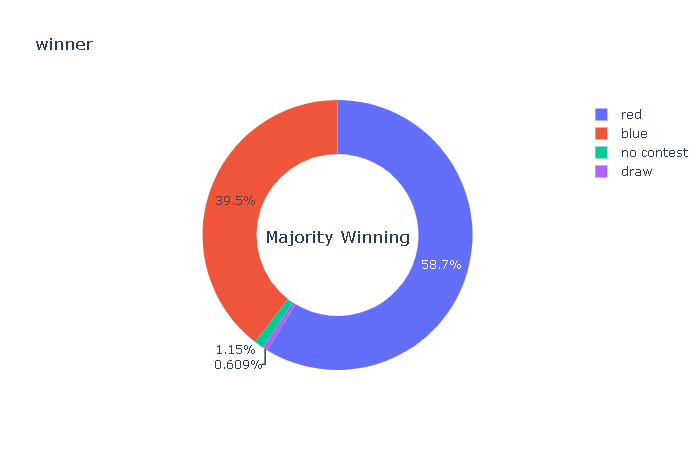

In [38]:
temp=data['winner'].value_counts()
fig={
    'data':[
        {
            'values':temp.values,
            'labels':temp.index,
            'domain': {'x':[0,1]},
            'hole':.6,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'winner',
        'annotations':[
            {
                'font':{
                    'size':17
                },
                'showarrow':False,
                'text':'Majority Winning',
                'x':0.5,
                'y':0.5
            }
        ]
    }
}
iplot(fig,filename='donut')

<Axes: xlabel='R_Age', ylabel='Density'>

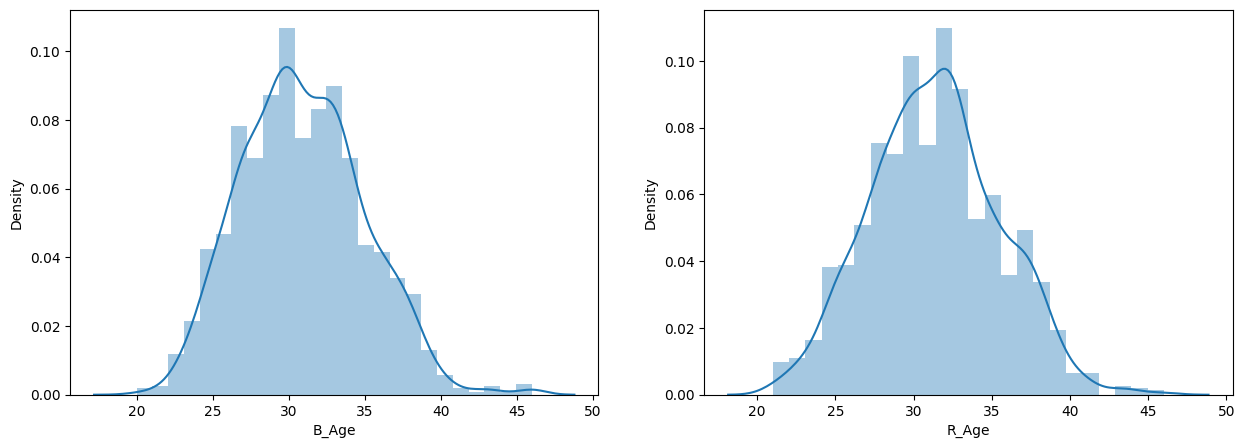

In [39]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(data.B_Age,ax=ax[0])
sns.distplot(data.R_Age,ax=ax[1])

In [40]:
BAge=data.groupby(['B_Age']).count()['winner']
BlueAge=BAge.sort_values(axis=0,ascending=False)
BlueAge.head(10)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

Text(0.5, 1.0, 'Age of Red Fighters')

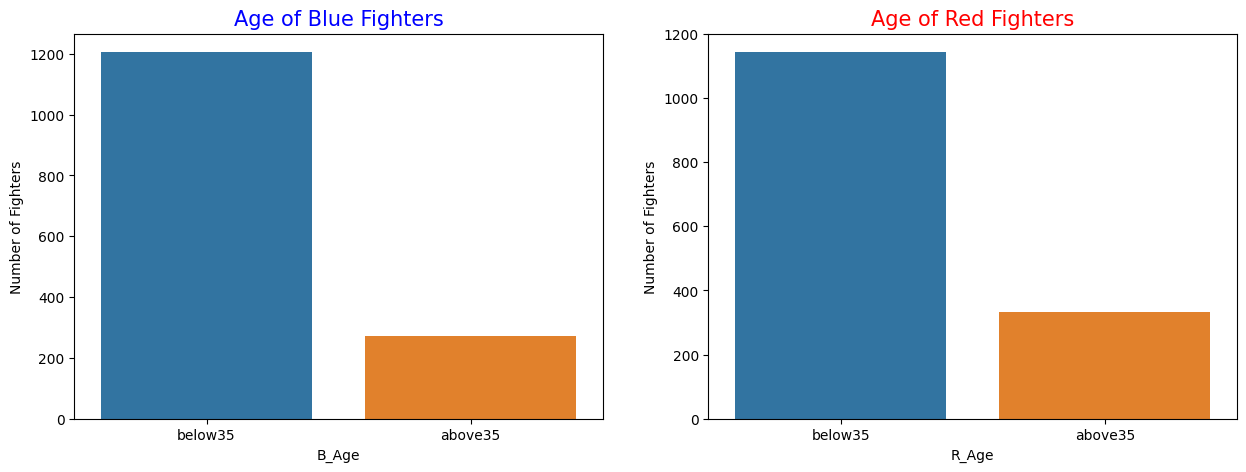

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

above35=['above35' if i>=35 else 'below35' for i in data.B_Age]
data_B=pd.DataFrame({'B_Age': above35})
sns.countplot(x=data_B.B_Age,ax=ax[0])
ax[0].set_ylabel('Number of Fighters')
ax[0].set_title('Age of Blue Fighters',color='blue', fontsize=15)

above35=['above35' if i>=35 else 'below35' for i in data.R_Age]
data_R=pd.DataFrame({'R_Age': above35})
sns.countplot(x=data_R.R_Age,ax=ax[1])
ax[1].set_ylabel('Number of Fighters')
ax[1].set_title('Age of Red Fighters', color='red', fontsize=15)

In [42]:
data['Age_Difference']=data.B_Age-data.R_Age
data[['Age_Difference','winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.459711
draw,-1.555556
no contest,0.058824
red,0.273304


<Axes: xlabel='R_Height', ylabel='Density'>

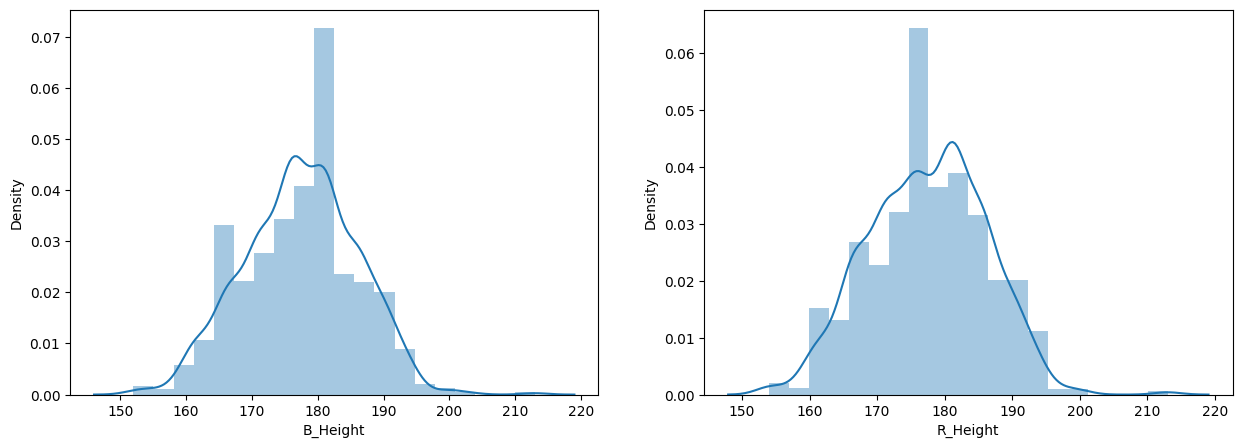

In [43]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(data.B_Height,bins=20,ax=ax[0])
sns.distplot(data.R_Height,bins=20,ax=ax[1])

<Axes: xlabel='B_Height', ylabel='Density'>

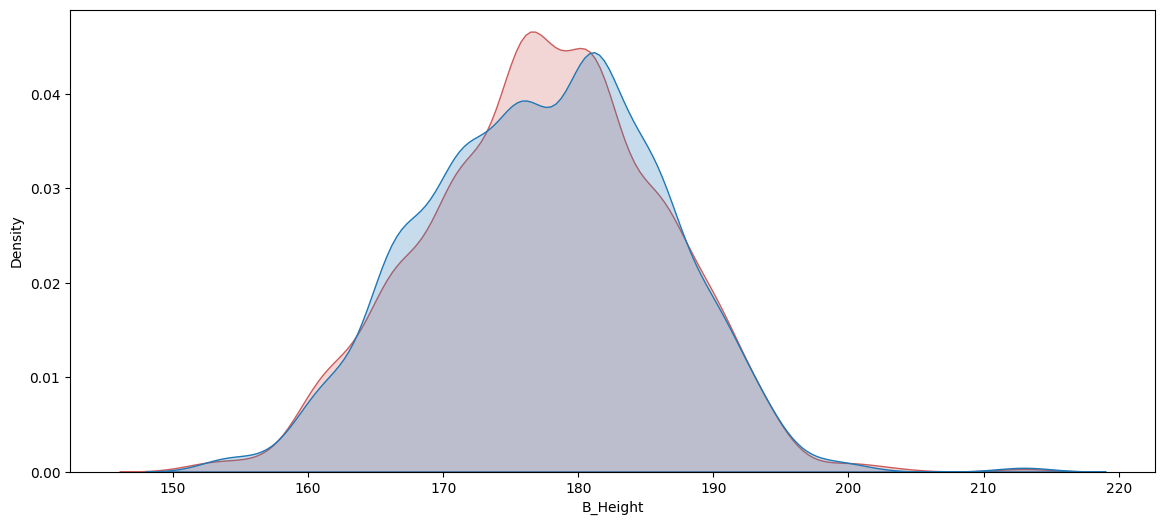

In [44]:
fig,ax=plt.subplots(figsize=(14,6))
sns.kdeplot(data.B_Height,shade=True,color='indianred',label='Red')
sns.kdeplot(data.R_Height,shade=True,label='Blue')

In [45]:
data['Height Difference']=data.B_Height-data.R_Height
data[['Height Difference','winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


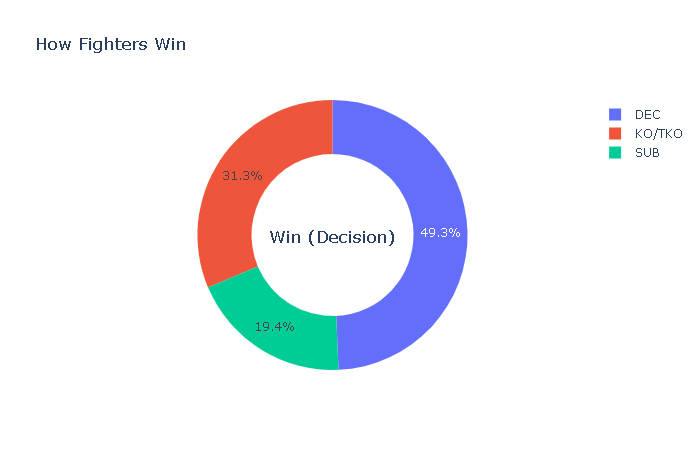

In [46]:
temp=data['winby'].value_counts()
fig={
    'data':[
        {
            'values':temp.values,
            'labels':temp.index,
            'domain': {'x':[0,1]},
            'hole':.6,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'How Fighters Win',
        'annotations':[
            {
                'font':{
                    'size':17
                },
                'showarrow':False,
                'text':'Win (Decision)',
                'x':0.5,
                'y':0.5
            }
        ]
    }
}
iplot(fig,filename='donut')

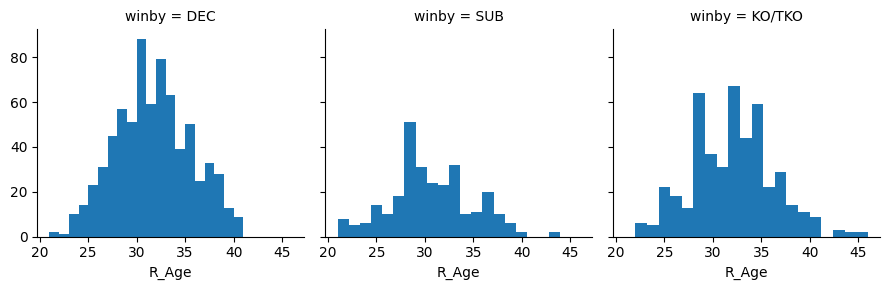

In [47]:
g=sns.FacetGrid(data,col='winby')
g.map(plt.hist,'R_Age',bins=20)

In [48]:
cnt_srs=data['R_Location'].value_counts().head(15)
cnt_srs

R_Location
Rio de Janeiro Brazil                    67
Montreal, Quebec Canada                  30
Coconut Creek, Florida United States     29
Denver, Colorado USA                     29
Coconut Creek, Florida USA               29
Las Vegas, Nevada USA                    24
Sao Paulo Brazil                         22
Albuquerque, New Mexico United States    21
Dublin Ireland                           19
Albuquerque, New Mexico USA              18
Sacramento, California USA               17
Chicago, Illinois USA                    15
San Jose, California USA                 14
Los Angeles, California USA              14
Boca Raton, Florida USA                  14
Name: count, dtype: int64

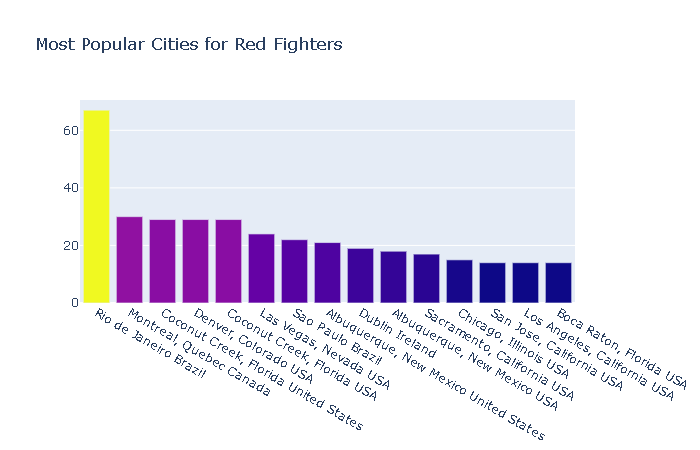

In [62]:
type(cnt_srs)
trace=go.Bar(x=cnt_srs.index,y=cnt_srs.values,marker=dict(color=cnt_srs.values))
layout=go.Layout(title='Most Popular Cities for Red Fighters')
datalist=[trace]
fig=go.Figure(data=datalist,layout=layout)
offline.iplot(fig,filename='Ratio')

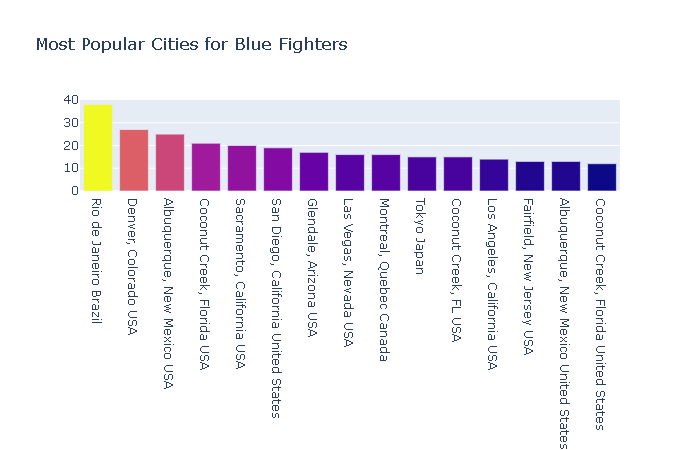

In [63]:
cnt_srs=data['B_Location'].value_counts().head(15)
trace=go.Bar(x=cnt_srs.index,y=cnt_srs.values,marker=dict(color=cnt_srs.values))
layout=go.Layout(title='Most Popular Cities for Blue Fighters')
datalist=[trace]
fig=go.Figure(data=datalist,layout=layout)
offline.iplot(fig,filename='Ratio')

In [73]:
r1=data[['B_Weight','B__Round1_Grappling_Reversals_Landed','B__Round1_Grappling_Standups_Landed',
     'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

<Axes: xlabel='B_Weight'>

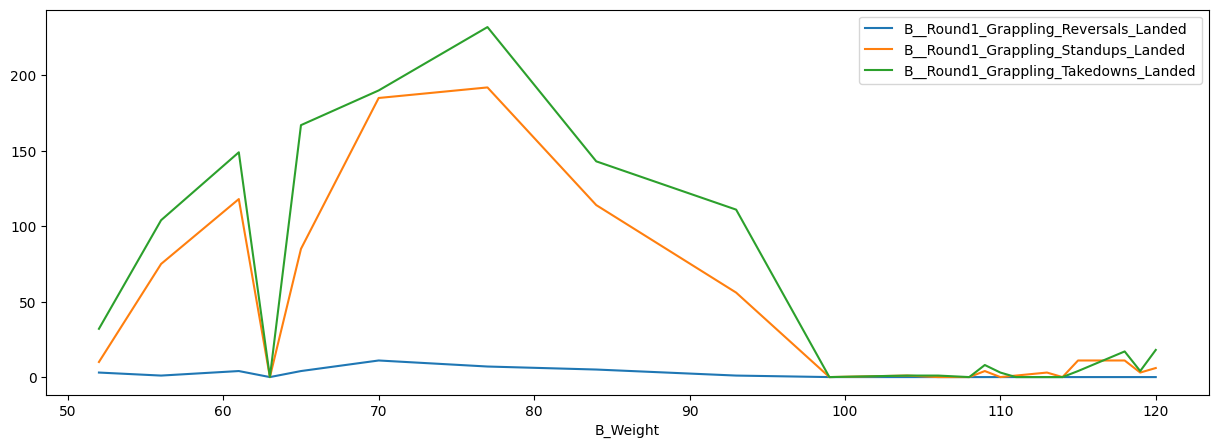

In [72]:
r1.plot(kind='line',figsize=(15,5))

In [77]:
r5=data[['B_Weight','B__Round5_Grappling_Reversals_Landed','B__Round5_Grappling_Standups_Landed',
     'B__Round5_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

<Axes: xlabel='B_Weight'>

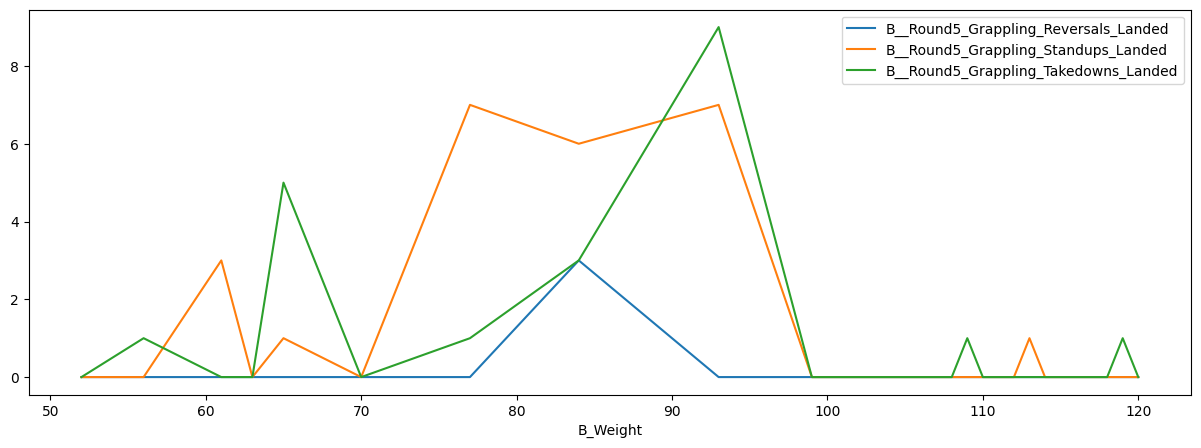

In [78]:
r5.plot(kind='line',figsize=(15,5))

<Axes: xlabel='R_Weight'>

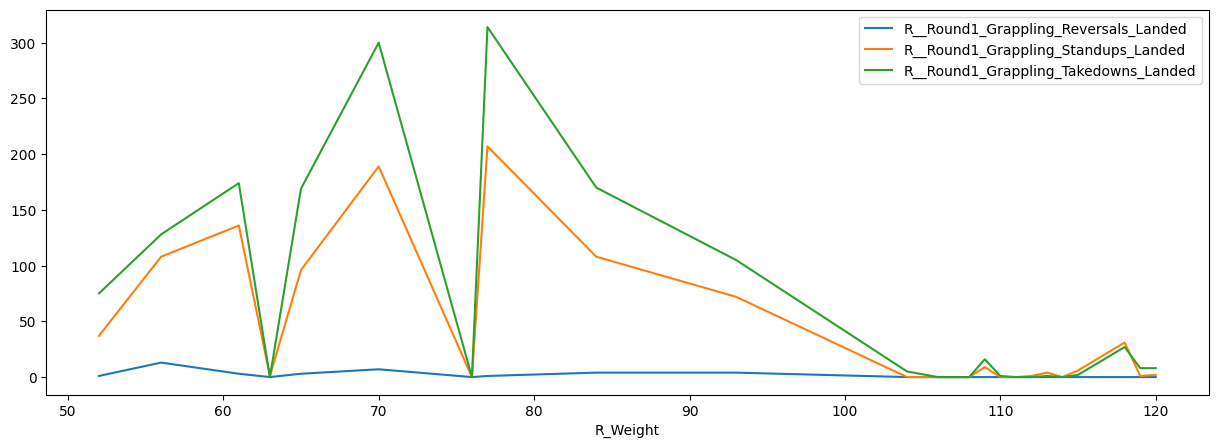

In [79]:
r1=data[['R_Weight','R__Round1_Grappling_Reversals_Landed','R__Round1_Grappling_Standups_Landed',
     'R__Round1_Grappling_Takedowns_Landed']].groupby('R_Weight').sum()
r1.plot(kind='line',figsize=(15,5))

<Axes: xlabel='R_Weight'>

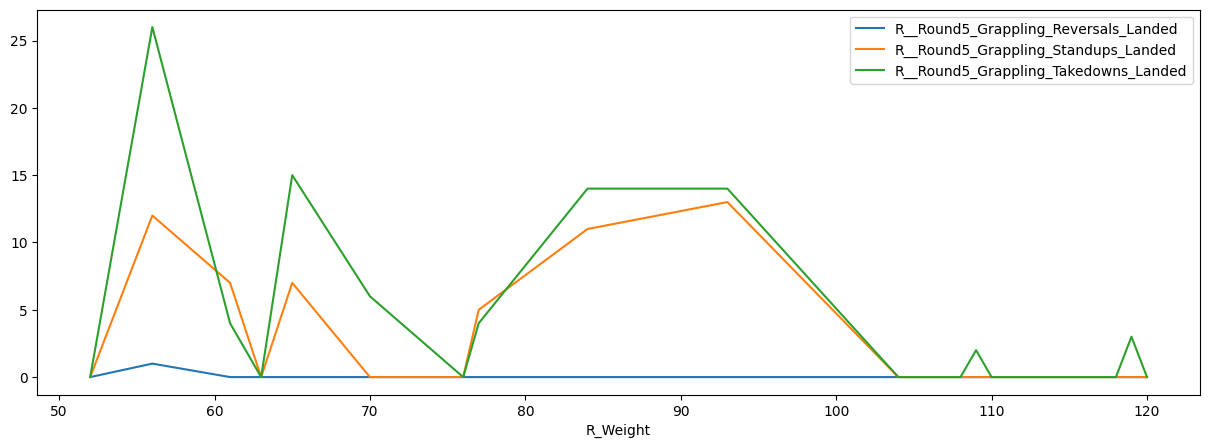

In [80]:
r5=data[['R_Weight','R__Round5_Grappling_Reversals_Landed','R__Round5_Grappling_Standups_Landed',
     'R__Round5_Grappling_Takedowns_Landed']].groupby('R_Weight').sum()
r5.plot(kind='line',figsize=(15,5))

In [110]:
clin_r1=data[['B_Weight','B__Round1_Strikes_Clinch Head Strikes_Landed',
              'B__Round1_Strikes_Clinch Leg Strikes_Landed',
              'B__Round1_Strikes_Clinch Body Strikes_Landed']]

In [111]:
clin_r1.head()

,B_Weight,B__Round1_Strikes_Clinch Head Strikes_Landed,B__Round1_Strikes_Clinch Leg Strikes_Landed,B__Round1_Strikes_Clinch Body Strikes_Landed
0,84,0.0,0.0,0.0
1,70,NaN,NaN,NaN
2,70,0.0,0.0,0.0
3,56,NaN,NaN,NaN
4,61,1.0,1.0,2.0


<Axes: xlabel='B_Weight'>

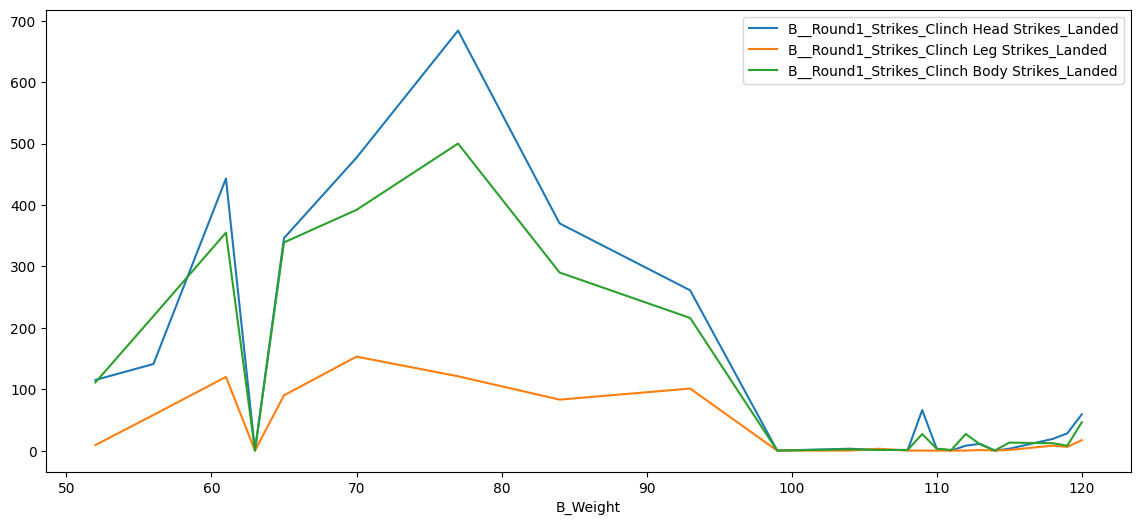

In [112]:
clin_r1=clin_r1.groupby('B_Weight').sum()
clin_r1.plot(kind='line',figsize=(14,6))

<Axes: xlabel='B_Weight'>

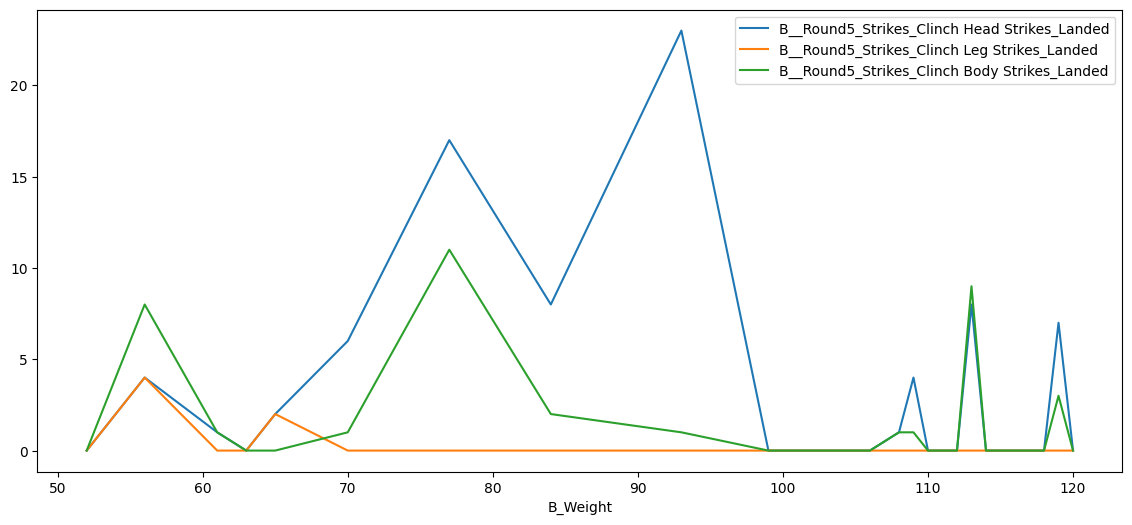

In [113]:
clin_r5=data[['B_Weight','B__Round5_Strikes_Clinch Head Strikes_Landed',
              'B__Round5_Strikes_Clinch Leg Strikes_Landed',
              'B__Round5_Strikes_Clinch Body Strikes_Landed']]
clin_r5=clin_r5.groupby('B_Weight').sum()
clin_r5.plot(kind='line',figsize=(14,6))

<Axes: xlabel='R_Weight'>

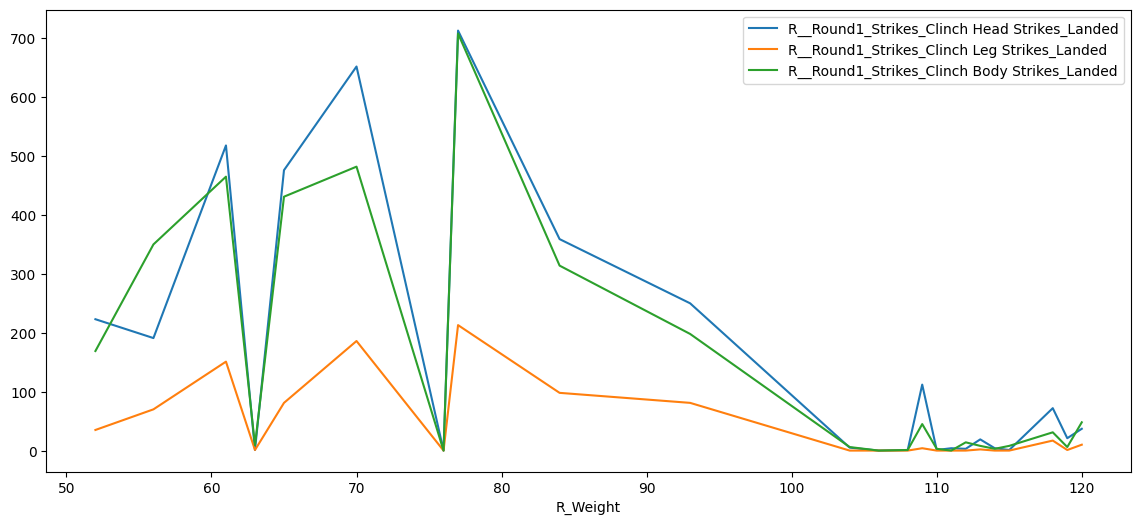

In [114]:
clin_r1=data[['R_Weight','R__Round1_Strikes_Clinch Head Strikes_Landed',
            'R__Round1_Strikes_Clinch Leg Strikes_Landed',
            'R__Round1_Strikes_Clinch Body Strikes_Landed']]
clin_r1=clin_r1.groupby('R_Weight').sum()
clin_r1.plot(kind='line',figsize=(14,6))

<Axes: xlabel='R_Weight'>

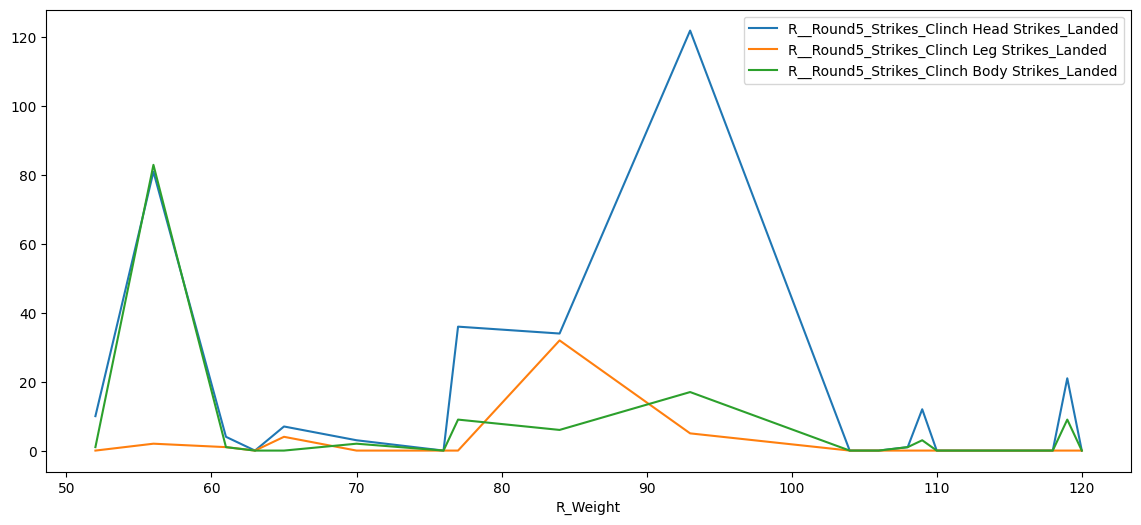

In [115]:
clin_r5=data[['R_Weight','R__Round5_Strikes_Clinch Head Strikes_Landed',
            'R__Round5_Strikes_Clinch Leg Strikes_Landed',
            'R__Round5_Strikes_Clinch Body Strikes_Landed']]
clin_r5=clin_r5.groupby('R_Weight').sum()
clin_r5.plot(kind='line',figsize=(14,6))